In [5]:
import pandas as pd;import numpy as np; import matplotlib.pyplot as plt; 
import pickle
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

In [6]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Function Declaration

In [7]:
# This function extracts the outlier points (the red points) from the z catalogue. 
def outlier_points(zp,zs):
        tmp_x      = np.where( (zp > float(0.00)) & (zp < float(3.0)) )[0]  # Change here 0 or 0.300
        tmp_ztrue  = zs[tmp_x]
        tmp_z_phot  = zp[tmp_x]
        tmp_dz     = ( tmp_ztrue - tmp_z_phot ) / ( 1.0 + tmp_z_phot )
        q75, q25   = np.percentile( tmp_dz, [75 ,25]) # COR IQR
        sigma      = ( q75 - q25 ) / float(1.349)
        threesigma = float(3.0) * sigma
        ox = np.where( ( np.fabs( tmp_dz ) > float(0.0600) ) & ( np.fabs( tmp_dz ) > threesigma ) )[0]
        tmp_z_phot1=[];tmp_z_true1=[];
        for i in range(len(ox)):
            tmp_z_phot1.append(tmp_z_phot.iloc[ox[i]])
            tmp_z_true1.append(tmp_ztrue.iloc[ox[i]])
        zp = pd.DataFrame(tmp_z_phot1)
        zs = pd.DataFrame(tmp_z_true1)  
        zt = pd.concat([zp,zs],axis=1)
        zt.columns = ['zphoto','zspec']
        return zt

In [8]:
# This function extracts the catastrophic outlier points (the golden points) from the z catalogue. 
def cat_outlier(zp,zs):
        tmp_x      = np.where( (zp > float(0.00)) & (zp <= float(3.0)) )[0] # Change here 0 or 0.300
        tmp_ztrue  = zs[tmp_x]
        tmp_z_phot  = zp[tmp_x]
        tmp_dz     = ( tmp_ztrue - tmp_z_phot )
        ox = np.where( np.fabs( tmp_dz ) > float(1.5) )[0]
        tmp_z_phot1=[];tmp_z_true1=[];
        for i in range(len(ox)):
            tmp_z_phot1.append(tmp_z_phot.iloc[ox[i]])
            tmp_z_true1.append(tmp_ztrue.iloc[ox[i]])
        zp = pd.DataFrame(tmp_z_phot1)
        zs = pd.DataFrame(tmp_z_true1)  
        zt = pd.concat([zp,zs],axis=1)
        zt.columns = ['zphoto','zspec']
        return zt  

# ----------------------------------------

### Reading in the WFIRST data file

In [9]:
bb = pd.read_csv('wfirst_data.csv',sep=" ")# photoz catalogue : WFIRST DATA

In [10]:
bb

,z_true,z_phot
0,0.0170,0.0461
1,0.0202,0.0494
2,0.0205,0.0224
3,0.0222,0.0875
4,0.0223,0.2089
...,...,...
178457,3.4967,3.4699
178458,3.4969,3.4647
178459,3.4971,0.4368
178460,3.4981,3.3841


In [11]:
bb.min()

z_true    0.017
z_phot    0.017
dtype: float64

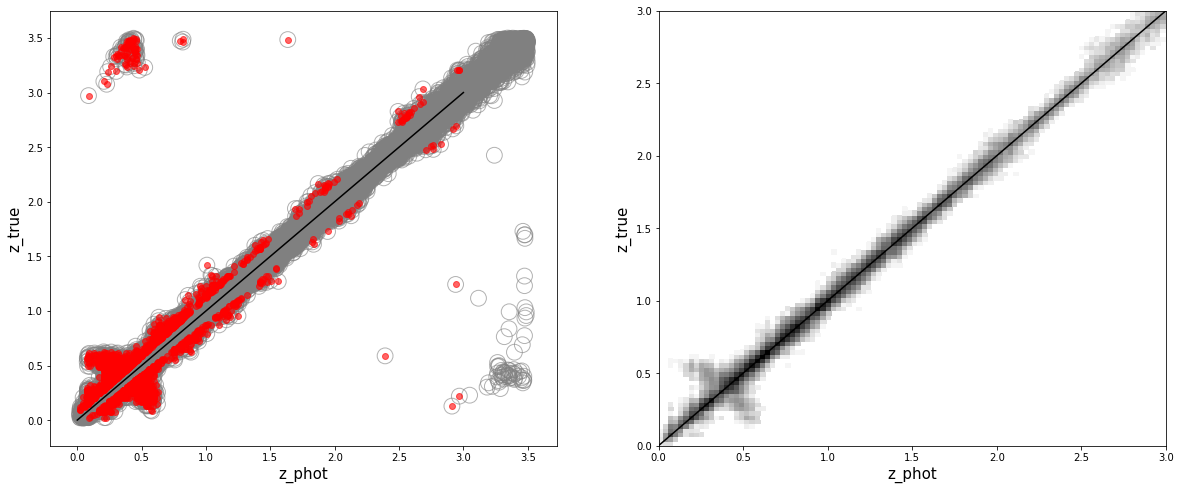

In [12]:
plt.rcParams['figure.figsize'] = [20,8] 
plt.subplot(1,2,1)
tx = np.where( bb.z_phot > 0.0 )[0]
#plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
 #           cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='r')
plt.scatter(bb.z_phot,bb.z_true,s=250,facecolors='none', edgecolors='grey',alpha=0.6)
plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.axhline(0.1)
#plt.axvline(1.2)

plt.subplot(1,2,2)
tx = np.where( bb.z_phot > 0.0 )[0]
#plt.rcParams['figure.figsize'] = [10,8] 
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys',alpha=2.5);

plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.axhline(0.1)
#plt.axvline(1.2)

In [13]:
print('Total No. of Outliers [Upto z~3.0]')
len(outlier_points(bb['z_phot'],bb['z_true']))

Total No. of Outliers [Upto z~3.0]


4663

In [14]:
print('Minimum z-spectro in Core:')
np.min(bb.z_phot[tx])

Minimum z-spectro in Core:


0.017

In [15]:
print('Minimum z-spectro in Outliers:')
np.min(outlier_points(bb['z_phot'],bb['z_true']).zspec)

Minimum z-spectro in Outliers:


0.0222

### Checking between Outliers and Catastrophic outliers

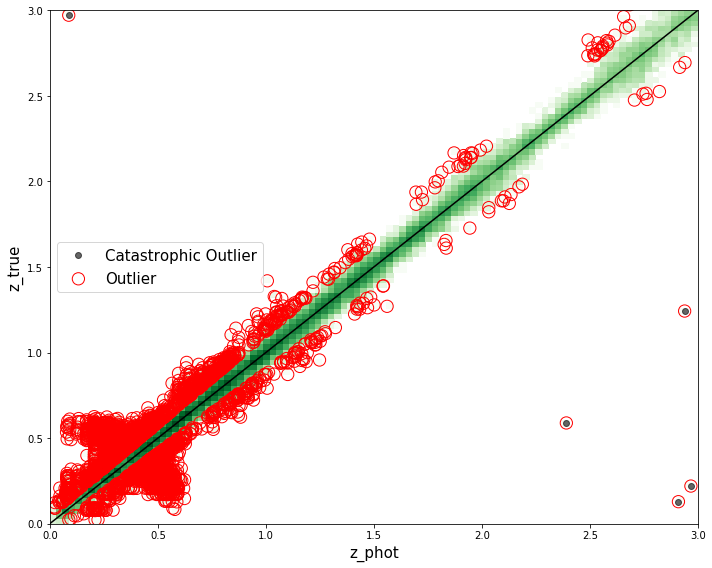

In [16]:
tx = np.where( bb.z_phot > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

#plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
 #        alpha=0.3,c='b')

plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='black',label='Catastrophic Outlier')# In outlier fn, change limit from 0 to 3

plt.scatter(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,
            s=150,facecolors='none', edgecolors='r',label='Outlier')
plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.xlim(0.,0.8)
#plt.ylim(1.5,3.0)
#plt.axhline(0.1)
plt.tight_layout()
plt.legend(fontsize=15)
#plt.savefig('tzpz_from_zphot_cat-catastrophic_check1_WFIRST.pdf',bbox_inches='tight')

### There are overlapping outlier-catastrophic outlier points, which is already known. 

#### Catastrophic Outliers Check

In [17]:
print('Total No. of Catastrophic Outliers')
len(cat_outlier(bb['z_phot'],bb['z_true']).zphoto)

Total No. of Catastrophic Outliers


79

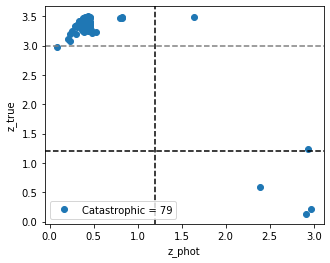

In [18]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,
         cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',label='Catastrophic = %s'%(len(cat_outlier(bb['z_phot'],bb['z_true']).zphoto)))
plt.axhline(1.2,c='black',linestyle='--');plt.axvline(1.2,c='black',linestyle='--')
plt.axhline(3.0,c='grey',linestyle='--')
plt.xlabel('z_phot');plt.ylabel('z_true')
plt.legend(loc='best')

Text(0, 0.5, 'z_true')

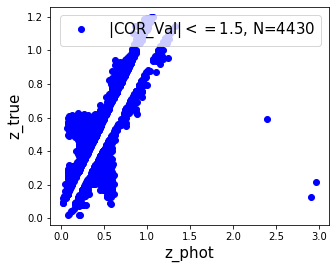

In [19]:
columns=['x','y']
index=range(0,len(outlier_points(bb['z_phot'],bb['z_true']).zphoto))
r_core = pd.DataFrame(columns=columns,index=index)
r_core['x']=outlier_points(bb['z_phot'],bb['z_true']).zphoto
r_core['y']=outlier_points(bb['z_phot'],bb['z_true']).zspec

r_core = r_core.sort_values('y')   
r_core.reset_index(inplace = True, drop = True) 
r_core = r_core.sort_values(by=['y']) 
r_core = r_core[r_core.y<=1.2] # Taking points only upto z_true <=1.2
plt.plot(r_core.x,r_core.y,'o',c='b',label=r'$\rm |COR\_Val|<=1.5$, N=%s'%(len(r_core.x)))   
#plt.xlim(0,3.0);plt.ylim(0,3.0)
plt.legend(fontsize=15)
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

### the three blue points in the right side are also Catastrophic points as seen from the previous plots. So we will not identify them as outliers anymore and reject them. 

In [20]:
np.shape(r_core)

(4430, 2)

In [21]:
r_core = r_core[r_core.x<2] # Removing the three catastrophic points in the right side

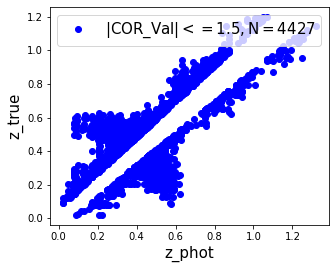

In [22]:
plt.plot(r_core.x,r_core.y,'o',c='b',label=r'$\rm |COR\_Val|<=1.5, N=%s$'%(len(r_core.x)))   
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.legend(fontsize=15)

### Now we have the outliers points, with z<1.2 and removed from all catastrophic points as well
### --------------------

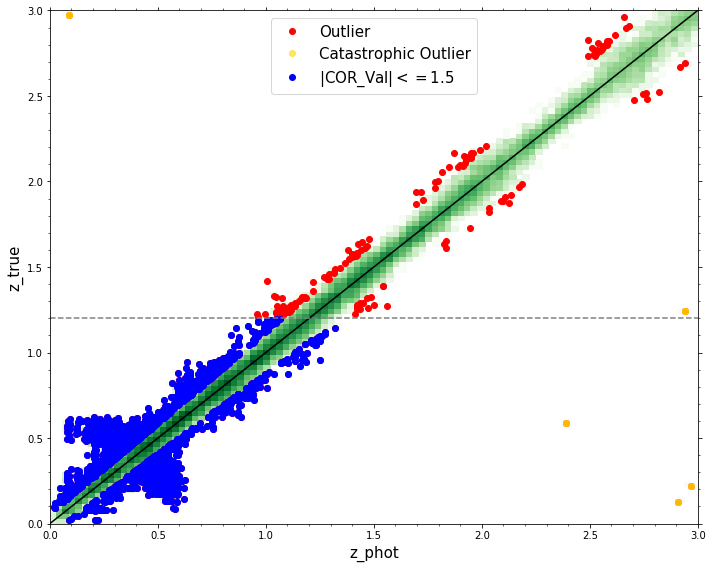

In [23]:
tx = np.where( bb.z_phot > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 
fig, ax = plt.subplots()
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens');

plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.99,c='r',label='Outlier')
plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='gold',label='Catastrophic Outlier')
#plt.scatter(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,
 #           s=150,c='r',label='Outlier')
plt.plot(r_core.x,r_core.y,'o',c='b',label=r'$\rm |COR\_Val|<=1.5$')    
plt.plot([0.0,3.0],[0.0,3.0],color='black')
plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='gold',label='_nolabel_')
#plt.xlim(0.,0.3)
#plt.ylim(2.0,3.0)
plt.axhline(1.2,c='grey',linestyle='--')
plt.tight_layout()
plt.legend(loc='upper center',fontsize=15)
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#plt.savefig('Meliisa_email_plots/tzpz_from_zphot_cat-catastrophic_check2.pdf',bbox_inches='tight')
#plt.savefig('P2.pdf',bbox_inches='tight')

# 24 Bins

In [24]:
# Assigning the outliers to a new variable, to keep the original unchanged. 
tzpz_out = r_core #outlier_points(bb['z_phot'],bb['z_true'])
tzpz_out.columns = ['zphoto','zspec'] # Specifying the column names
tzpz_out = tzpz_out.sort_values('zspec')  # Sorting by z_true redshift value
#tzpz_out.to_csv('tzpz_plotting/tzpz_plotting_data_red.csv',sep=' ',index=False)
#blue_w=pd.read_csv('../Data/blue_WFIRST.csv',sep=' ')
#blue_w
#blue_w = blue_w.dropna()
#blue_w.columns=['zspec','zphoto']
#tzpz_out = blue_w

In [25]:
red = tzpz_out[tzpz_out['zspec']<=1.2] # Outlier  z_spec<= 1.2
grey = bb[bb['z_true']<=1.2] # Core z_spec<= 1.2

In [26]:
grey

,z_true,z_phot
0,0.0170,0.0461
1,0.0202,0.0494
2,0.0205,0.0224
3,0.0222,0.0875
4,0.0223,0.2089
...,...,...
128245,1.1999,1.2288
128246,1.1999,1.1999
128247,1.2000,1.2178
128248,1.2000,1.2274


Text(0, 0.5, 'z_true')

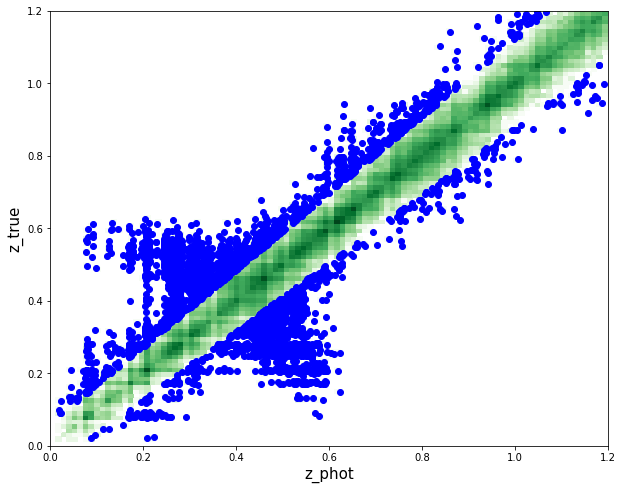

In [27]:
tx = np.where( grey.z_phot > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 
fig, ax = plt.subplots()
plt.hist2d( grey.z_phot[tx], grey.z_true[tx], bins=100, range=[[0.0,1.2],[0.0,1.2]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens');
plt.plot(red.zphoto,red.zspec,'o',c='b')
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

In [28]:
# Outliers
tzpz_out

,zphoto,zspec
0,0.0875,0.0222
1,0.2089,0.0223
2,0.2228,0.0226
3,0.0970,0.0283
4,0.1278,0.0456
...,...,...
4425,1.0240,1.1904
4426,1.0054,1.1907
4427,1.0496,1.1918
4428,1.0671,1.1953


In [31]:
# Core
grey.iloc[:, :2]

,z_true,z_phot
0,0.0170,0.0461
1,0.0202,0.0494
2,0.0205,0.0224
3,0.0222,0.0875
4,0.0223,0.2089
...,...,...
128245,1.1999,1.2288
128246,1.1999,1.1999
128247,1.2000,1.2178
128248,1.2000,1.2274


In [30]:
# Making Bins, because we will break the data in bins now. 
bins  = np.linspace(0,1.2,25)
start = (bins[0] + bins[1])/2.; end = (bins[-1] + bins[-2])/2.

label = np.linspace(start,end,24)
print(label)

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175]


In [32]:
# Binning the data to compute the mean redshifts per bin and the no. of candidates
#bins = np.linspace(0,1.2,13)
#label = np.linspace(0.05,1.15,12)


# Calling the 'tzpz_main_points' file and extracting pts < 1.5 COR
bb = grey.iloc[:, :2]


bb['bin_z'] = pd.cut(bb.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)

tzpz_main = bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).mean()
tzpz_main.columns = ['z_true_mean','z_phot_mean']
tzpz_main.reset_index(drop=True, inplace=True)
#tzpz_main_points = tzpz_main
tzpz_main =  pd.concat([tzpz_main,N],axis=1,ignore_index=True)
tzpz_main =  pd.concat([tzpz_main,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_main.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_main = tzpz_main[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_main = tzpz_main.iloc[0:24 , : ]
#tzpz_main = tzpz_main.sort_values('z_true_mean')  
tzpz_main

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Bin,N,z_true_mean,z_phot_mean
0,0.025,74,0.039312,0.065124
1,0.075,1230,0.082405,0.089037
2,0.125,960,0.131160,0.131329
3,0.175,1515,0.177823,0.185987
4,0.225,3753,0.218346,0.234216
5,0.275,5961,0.271649,0.284120
6,0.325,5047,0.320510,0.329498
7,0.375,4114,0.378426,0.400753
8,0.425,6569,0.426544,0.433415
9,0.475,8744,0.472795,0.459253


In [33]:
tzpz_main['N'].sum()

128250

In [34]:
bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 ])

In [35]:
#bins = np.linspace(0,1.2,13)
#label = np.linspace(0.05,1.15,12)
tzpz_out_COR = red
tzpz_out_COR = tzpz_out_COR[['zphoto','zspec']]
tzpz_out_COR.columns=['z_phot','z_true']
tzpz_out_COR['bin_z'] = pd.cut(tzpz_out_COR.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(tzpz_out_COR.groupby(pd.cut(tzpz_out_COR.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)
#tzpz_out_COR = tzpz_out_COR.drop(['COR_val'],axis=1)
print(N)
tzpz_outt = tzpz_out_COR.groupby(pd.cut(tzpz_out_COR.z_true, bins=bins,labels=label)).mean()
#print(tzpz_outt)
tzpz_outt.columns = ['z_true_mean','z_phot_mean']
tzpz_outt.reset_index(drop=True, inplace=True)

tzpz_outt =  pd.concat([tzpz_outt,N],axis=1,ignore_index=True)
tzpz_outt =  pd.concat([tzpz_outt,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_outt.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_outt = tzpz_outt[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_outt = tzpz_outt.iloc[0:24 , :]
#tzpz_outt = tzpz_outt.sort_values('z_true_mean')  
tzpz_outt['f_out'] = tzpz_outt.N/(tzpz_main.N)
#tzpz_outt

      N
0     6
1    47
2    47
3   124
4   286
5   489
6   434
7   387
8   330
9   710
10  578
11  269
12  102
13   56
14   73
15  107
16   77
17  114
18   77
19   42
20   13
21   20
22   18
23   21


In [36]:
tzpz_outt = tzpz_outt.fillna(0)

In [37]:
tzpz_outt['N'].sum()

4427

In [38]:
tzpz_outt['f_out'].sum()

0.9396102536066713

In [39]:
test = pd.concat([tzpz_main,tzpz_outt.iloc[: , 1:]],axis=1)
test.columns = ['Bin','N_G','z_true_mean_G','z_phot_mean_G','N_R','z_true_mean_R','z_phot_mean_R','fout']
test['COR_Outlier_Bias'] = (test.z_true_mean_R - test.z_phot_mean_R)/(1+test.z_phot_mean_R)

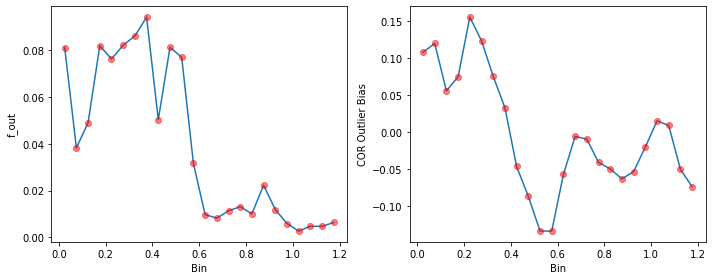

In [40]:
plt.rcParams['figure.figsize'] = [10,4]
plt.subplot(1,2,1)
plt.plot(test.Bin,test.fout)
plt.plot(test.Bin,test.fout,'o',c='r',alpha=0.5)
plt.xlabel('Bin')
plt.ylabel('f_out')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(test.Bin,test.COR_Outlier_Bias)
plt.plot(test.Bin,test.COR_Outlier_Bias,'o',c='r',alpha=0.5)
plt.xlabel('Bin')
plt.ylabel('COR Outlier Bias')
plt.tight_layout()

In [41]:
# G = Green/Grey : Core
# R = Red : Outlier
test

,Bin,N_G,z_true_mean_G,z_phot_mean_G,N_R,z_true_mean_R,z_phot_mean_R,fout,COR_Outlier_Bias
0,0.025,74,0.039312,0.065124,6,0.142900,0.031200,0.081081,0.108320
1,0.075,1230,0.082405,0.089037,47,0.213711,0.083509,0.038211,0.120167
2,0.125,960,0.131160,0.131329,47,0.200009,0.136321,0.048958,0.056047
3,0.175,1515,0.177823,0.185987,124,0.265270,0.176574,0.081848,0.075385
4,0.225,3753,0.218346,0.234216,286,0.407175,0.217445,0.076206,0.155843
5,0.275,5961,0.271649,0.284120,489,0.429761,0.272257,0.082033,0.123798
6,0.325,5047,0.320510,0.329498,434,0.422528,0.322432,0.085992,0.075691
7,0.375,4114,0.378426,0.400753,387,0.420800,0.374901,0.094069,0.033384
8,0.425,6569,0.426544,0.433415,330,0.360132,0.425751,0.050236,-0.046024
9,0.475,8744,0.472795,0.459253,710,0.348608,0.476078,0.081199,-0.086357


Text(0.47, 0.1, '$\\delta z$')

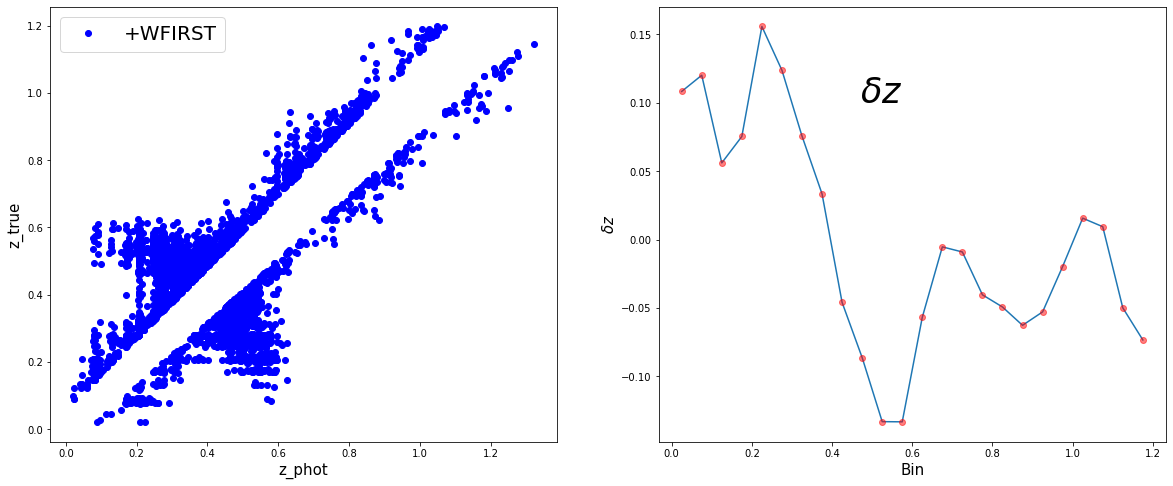

In [42]:
plt.rcParams['figure.figsize'] = [20,8]
fig,(a1,a2)=plt.subplots(1, 2, figsize=(20, 8))
a1.plot(tzpz_out.zphoto,tzpz_out.zspec,'o',c='b',label='+WFIRST')
a1.set_xlabel('z_phot',fontsize=15);a1.set_ylabel('z_true',fontsize=15)
a1.legend(fontsize=20)
#a.subplot(1,2,2)
a2.plot(test.Bin,test.COR_Outlier_Bias)
a2.plot(test.Bin,test.COR_Outlier_Bias,'o',c='r',alpha=0.5)
a2.set_xlabel('Bin',fontsize=15)
a2.set_ylabel('$\delta z$',fontsize=15)
a2.text(0.47,0.1,'$\delta z$',color='black',fontsize=35)

In [167]:
#with open('myplot_WFIRST.pkl','wb') as fid:
 #   pickle.dump(fig, fid)